---
# **Project** : **Face Detection on image and video**
---
### ---> **Sahil Kumar 777**

This project performs face detection in real time using mediapipe framework. The output can be used to detect human faces and count number of human faces in the frame, and it can be used in various applications.

* **Objective :-** Detect Face
* **Modules :-** openCV, Mediapipe


## Install Important Libraries

In [1]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio

## Visualization Functions

### Visulaize Face Bounding Box  on images

In [1]:
from typing import Tuple, Union
import math
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def _normalized_to_pixel_coordinates(
    normalized_x: float, normalized_y: float, image_width: int,
    image_height: int) -> Union[None, Tuple[int, int]]:
  """Converts normalized value pair to pixel coordinates."""

  # Checks if the float value is between 0 and 1.
  def is_valid_normalized_value(value: float) -> bool:
    return (value > 0 or math.isclose(0, value)) and (value < 1 or
                                                      math.isclose(1, value))

  if not (is_valid_normalized_value(normalized_x) and
          is_valid_normalized_value(normalized_y)):
    # TODO: Draw coordinates even if it's outside of the image bounds.
    return None
  x_px = min(math.floor(normalized_x * image_width), image_width - 1)
  y_px = min(math.floor(normalized_y * image_height), image_height - 1)
  return x_px, y_px


def visualize(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes and keypoints on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  annotated_image = image.copy()
  height, width, _ = image.shape

  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(annotated_image, start_point, end_point, TEXT_COLOR, 3)

    # Draw keypoints
    for keypoint in detection.keypoints:
      keypoint_px = _normalized_to_pixel_coordinates(keypoint.x, keypoint.y,
                                                     width, height)
      color, thickness, radius = (0, 255, 0), 2, 2
      cv2.circle(annotated_image, keypoint_px, thickness, color, radius)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    category_name = '' if category_name is None else category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(annotated_image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return annotated_image

### Generete and Save Video from ImageList and Detection Results

In [24]:
# Convert To Video

import cv2
import mediapipe as mp

def visualize_video(filename,images) :
  """ Function to generate video from list of images.
      Args:
          filename
          images
      Return :
          It returns filename """

  imagesList = [image for image in images]

  # Define the codec and create a VideoWriter object
  fourcc = cv2.VideoWriter_fourcc(*'VP80')  # Can use other codecs like 'mp4v' (for .mp4 files) but mp4 converted files are not supported by coalb and browsers
  fps = 30  # Frames per second
  height, width, _ = imagesList[0].shape

  # Open VideoWriter
  video_writer =  cv2.VideoWriter(filename, fourcc, fps, (width, height))

  # Display gestures and hand landmarks.
  for image in imagesList:
    annotated_image = image.copy()
    video_writer.write(annotated_image)
  video_writer.release() # Closes VideoWriter
  return filename

### Function to Play Video In Colab

In [27]:
from IPython.display import HTML
from base64 import b64encode

def play_video_in_colab(filepath) :

  with open(filepath,'rb') as file :
    mp4 = file.read()
    data_url = "data:video/"+ filepath.split('.')[-1] +";base64,"  + b64encode(mp4).decode()

  return HTML("""
    <video src="%s" type="video/webm" width="640" height="480" controls autoplay>
    </video>
  """  % data_url)

## Image face detection


In [2]:
# Load the pre trained model
!wget -q -O faceDetector.tflite -q https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/1/blaze_face_short_range.tflite


In [5]:
import cv2
import mediapipe as mp
from mediapipe.tasks.python.components.containers.category import Category

# Initializing the recogniser options
BaseOptions = mp.tasks.BaseOptions
FaceDetector = mp.tasks.vision.FaceDetector
FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = 'faceDetector.tflite'
options = FaceDetectorOptions(base_options=BaseOptions(model_asset_path=model_path),running_mode=VisionRunningMode.IMAGE)


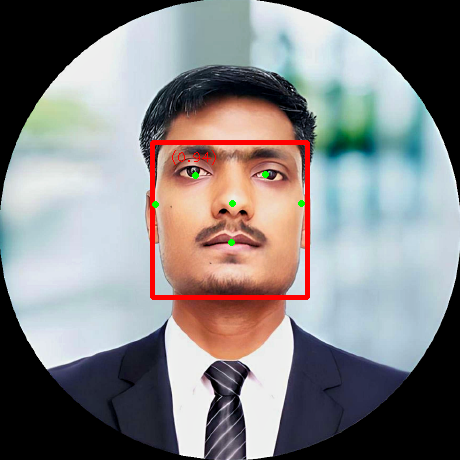

In [9]:
### Guesture Recognition and Handpints Detection
from google.colab.patches import cv2_imshow

# STEP 1: Initialize the detector
with FaceDetector.create_from_options(options) as detector:

  image = mp.Image.create_from_file("SahilProfilePic.png")

  # Convert the frame received from OpenCV to a MediaPipe’s Image object.
  # mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image.numpy_view())

  # STEP 4: Recognize gestures in the input image.
  detection_result = detector.detect(image)

  # STEP 5: Process the result. In this case, visualize it.
  annotated_image = visualize(image.numpy_view(), detection_result)
  cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))


In [12]:
detection_result

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=152, origin_y=142, width=155, height=155), categories=[Category(index=0, score=0.9388171434402466, display_name=None, category_name=None)], keypoints=[NormalizedKeypoint(x=0.4259977340698242, y=0.3814249634742737, label='', score=0.0), NormalizedKeypoint(x=0.57747882604599, y=0.3795425295829773, label='', score=0.0), NormalizedKeypoint(x=0.5046518445014954, y=0.4425066113471985, label='', score=0.0), NormalizedKeypoint(x=0.5040968656539917, y=0.5278877019882202, label='', score=0.0), NormalizedKeypoint(x=0.33815672993659973, y=0.4436083436012268, label='', score=0.0), NormalizedKeypoint(x=0.6565180420875549, y=0.4415459930896759, label='', score=0.0)])])

## Video face detection


In [ ]:
# Load the pre trained model
!wget -q -O faceDetector.tflite -q https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/1/blaze_face_short_range.tflite


In [19]:
import cv2
import mediapipe as mp
from mediapipe.tasks.python.components.containers.category import Category

# Initializing the recogniser options
BaseOptions = mp.tasks.BaseOptions
FaceDetector = mp.tasks.vision.FaceDetector
FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = 'faceDetector.tflite'
options = FaceDetectorOptions(base_options=BaseOptions(model_asset_path=model_path),running_mode=VisionRunningMode.VIDEO)


In [22]:
### Guesture Recognition and Handpints Detection

# STEP 1: Initialize the detector
with FaceDetector.create_from_options(options) as detector:

  # STEP 2: Intialize the video capturing into frames
  cap = cv2.VideoCapture('InputVideo.mp4')
  fps = cap.get(cv2.CAP_PROP_FPS)
  images=[]
  results=[]
  i=0

  while cap.isOpened():

    # STEP 3: Read the frames one by one
    success,frame = cap.read();

    if not success :
      if i==0:
        print('Empty frame')
      else :
        print('Detection Completed')
        print('Total Frames : ',i)
      break

    frame_timestamp_ms = int(cap.get(cv2.CAP_PROP_POS_MSEC)) # Get timestamp of the frame
    # frame = cv2.flip(frame, 1) # flip the frame

    # Convert the frame received from OpenCV to a MediaPipe’s Image object.
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

    # STEP 4: Recognize gestures in the input image.
    detection_result = detector.detect_for_video(mp_image,frame_timestamp_ms)

    # STEP 5: Process the result. In this case, visualize it.
    annotated_image = visualize(image.numpy_view(), detection_result)
    images.append(annotated_image)
    # cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
    i+=1

  cap.release()


Detection Completed
Total Frames :  317


In [25]:
visualize_video('OutputVideo1.webm',images)

'OutputVideo1.webm'

In [28]:
play_video_in_colab('OutputVideo1.webm')